In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import PIL.Image as Image
from tensorflow.keras import layers, models, datasets

In [4]:
#using MobileNet Model
classifier_url='https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2'

In [7]:
inp_shape=(224,224)

model=tf.keras.Sequential([
    hub.KerasLayer(classifier_url,input_shape=inp_shape+(3,))
])

In [24]:
lp = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imnet_labels = np.array(open(lp).read().splitlines())

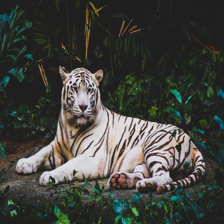

In [13]:
I=Image.open(r'./tiger.jpg').resize(inp_shape)
I

In [16]:
print(np.array(I))
I=np.array(I)/255.0

[[[31 31 31]
  [31 31 31]
  [31 31 31]
  ...
  [31 31 31]
  [31 31 31]
  [31 31 31]]

 [[31 31 31]
  [31 31 31]
  [31 31 31]
  ...
  [31 31 31]
  [31 31 31]
  [31 31 31]]

 [[31 31 31]
  [31 31 31]
  [31 31 31]
  ...
  [31 31 31]
  [31 31 31]
  [31 31 31]]

 ...

 [[31 31 31]
  [31 31 31]
  [31 31 31]
  ...
  [31 31 31]
  [31 31 31]
  [31 31 31]]

 [[31 31 31]
  [31 31 31]
  [31 31 31]
  ...
  [31 31 31]
  [31 31 31]
  [31 31 31]]

 [[31 31 31]
  [31 31 31]
  [31 31 31]
  ...
  [31 31 31]
  [31 31 31]
  [31 31 31]]]


In [17]:
print(I)

[[[0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]
  ...
  [0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]]

 [[0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]
  ...
  [0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]]

 [[0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]
  ...
  [0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]]

 ...

 [[0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]
  ...
  [0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]]

 [[0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]


In [18]:
I.shape

(224, 224, 3)

In [19]:
r=model.predict(I[np.newaxis,...]) #(1,224,224,3)

1/1 [==============================] - 0s 325ms/step


In [20]:
r.shape

(1, 1001)

In [21]:
pc = np.argmax(r[0],axis=-1)
pc

293

In [25]:
imnet_labels[pc]

'tiger'

Text(0.5, 1.0, 'tiger')

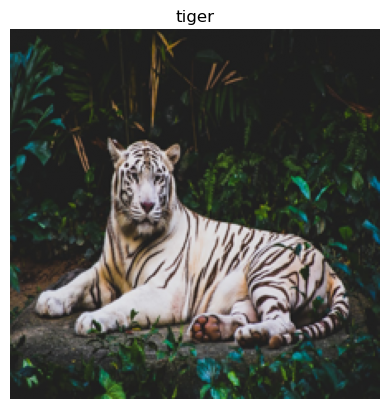

In [27]:
plt.imshow(I)
plt.axis('off')
pcn=imnet_labels[pc]
plt.title(pcn)

In [28]:


data_root = tf.keras.utils.get_file(
'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
untar=True)



228813984/228813984 [==============================] - 195s 1us/step


In [30]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
imData = image_generator.flow_from_directory(str(data_root),target_size=inp_shape)

Found 3670 images belonging to 5 classes.


In [31]:
for imB,lbB in imData:
    print(imB.shape)
    print(lbB.shape)
    break

(32, 224, 224, 3)
(32, 5)


In [33]:
rB=model.predict(imB)
rB.shape

1/1 [==============================] - 0s 167ms/step


(32, 1001)

In [35]:
pcn=imnet_labels[np.argmax(rB,axis=-1)]
pcn

array(['daisy', 'daisy', 'daisy', 'daisy', 'picket fence', 'coral fungus',
       'viaduct', 'daisy', 'daisy', 'daisy', 'bee', 'feather boa',
       'fire screen', 'bee', 'bakery', 'hay', 'daisy', 'greenhouse',
       'daisy', "yellow lady's slipper", 'spider web', 'ant', 'vase',
       'conch', 'mushroom', 'sea urchin', 'buckeye', 'cardoon', 'daisy',
       'hummingbird', 'bee', 'daisy'], dtype='<U30')

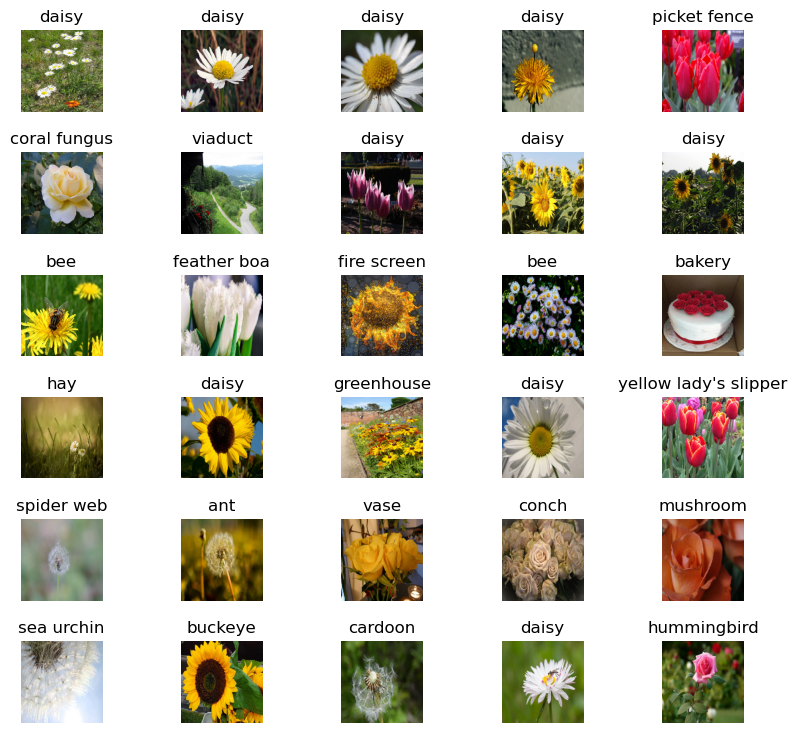

In [38]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(imB[i])
    plt.title(pcn[i])
    plt.axis('off')

In [39]:
headLessModel_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2'

In [40]:
headLessModel = hub.KerasLayer(headLessModel_url,input_shape=inp_shape+(3,))

In [41]:
fImB = headLessModel(imB)
fImB.shape #1280 features

TensorShape([32, 1280])

In [42]:
headLessModel.trainable=False

In [43]:
newModel=tf.keras.Sequential([
    headLessModel,
    tf.keras.layers.Dense(imData.num_classes,activation='softmax')
])

In [47]:
newModel.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['acc'])

In [48]:
newModel.fit(imData,epochs=5)

Epoch 1/5


/home/av/.local/lib/python3.11/site-packages/keras/src/backend.py:5562: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


115/115 [==============================] - 22s 167ms/step - loss: 0.6706 - acc: 0.7567
Epoch 2/5
115/115 [==============================] - 19s 163ms/step - loss: 0.3396 - acc: 0.8853
Epoch 3/5
115/115 [==============================] - 22s 194ms/step - loss: 0.2675 - acc: 0.9155
Epoch 4/5
115/115 [==============================] - 23s 196ms/step - loss: 0.2224 - acc: 0.9346
Epoch 5/5
115/115 [==============================] - 21s 180ms/step - loss: 0.1902 - acc: 0.9452


In [52]:
cn = np.array(['Daisy','Dandelion','Roses','Sunflowers','Tulips'])

In [53]:
p = newModel.predict(imB)
p_ids = np.argmax(p,axis=-1)
pcn = cn[p_ids]

1/1 [==============================] - 0s 158ms/step


In [54]:
l_ids = np.argmax(lbB,axis=-1)

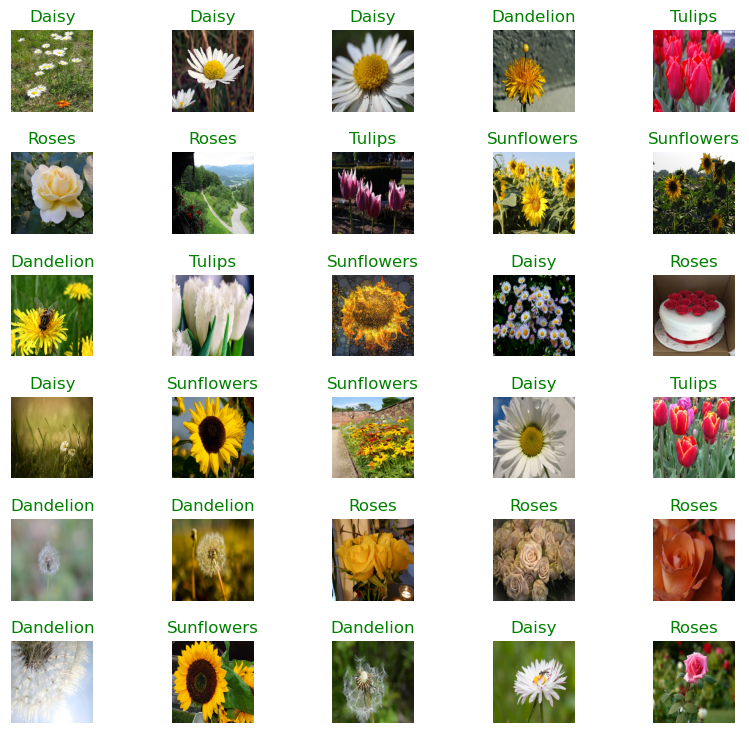

In [55]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(imB[i])
    color = 'green' if p_ids[i] == l_ids[i] else 'red'
    plt.title(pcn[i].title(),color=color)
    plt.axis('off')